<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/SusySecondoEsperimento1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import json
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# file con i dati di tutti i ristoranti random
sort = 'Random'

relevance = '1n9vdCnppJGdE6M6HdKYlksuTntQYHA7P'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': relevance})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

# leggo il csv con pandas
res = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

In [2]:
#RACCOLTA DATI

#Percentuali di maschi e femmine sopra e sotto i 40, per ogni ristorante

# converto le stringhe di age in int
res.age = pd.to_numeric(res.age, errors='coerce').fillna(0).astype(np.int64)


totaleWhite = len(res[(res['ethnicity'] == 'white')])
whiteU30 = (len(res[(res['ethnicity'] == 'white') & (res['age'] <= 30)]) * 100) / totaleWhite
whiteU40 = (len(res[(res['ethnicity'] == 'white') & (res['age'] > 30) & (res['age'] <= 40)]) * 100) / totaleWhite
whiteU55 = (len(res[(res['ethnicity'] == 'white') & (res['age'] > 40) & (res['age'] <= 55)]) * 100) / totaleWhite
whiteOver = (len(res[(res['ethnicity'] == 'white') & (res['age'] > 55)]) * 100) / totaleWhite


totaleBlack = len(res[(res['ethnicity'] == 'black or african american')])
blackU30 = (len(res[(res['ethnicity'] == 'black or african american') & (res['age'] <= 30)]) * 100) / totaleBlack
blackU40 = (len(res[(res['ethnicity'] == 'black or african american') & (res['age'] > 30) & (res['age'] <= 40)]) * 100) / totaleBlack
blackU55 = (len(res[(res['ethnicity'] == 'black or african american') & (res['age'] > 40) & (res['age'] <= 55)]) * 100) / totaleBlack
blackOver = (len(res[(res['ethnicity'] == 'black or african american') & (res['age'] > 55)]) * 100) / totaleBlack


totaleHispanic = len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin')])
hispanicU30 = (len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] <= 30)]) * 100) / totaleHispanic
hispanicU40 = (len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] > 30) & (res['age'] <= 40)]) * 100) / totaleHispanic
hispanicU55 = (len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] > 40) & (res['age'] <= 55)]) * 100) / totaleHispanic
hispanicOver = (len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] > 55)]) * 100) / totaleHispanic


totaleAsian = len(res[(res['ethnicity'] == 'asian')])
asianU30 = (len(res[(res['ethnicity'] == 'asian') & (res['age'] <= 30)]) * 100) / totaleAsian
asianU40 = (len(res[(res['ethnicity'] == 'asian') & (res['age'] > 30) & (res['age'] <= 40)]) * 100) / totaleAsian
asianU55 = (len(res[(res['ethnicity'] == 'asian') & (res['age'] > 40) & (res['age'] <= 55)]) * 100) / totaleAsian
asianOver = (len(res[(res['ethnicity'] == 'asian') & (res['age'] > 55)]) * 100) / totaleAsian



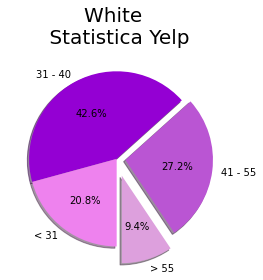

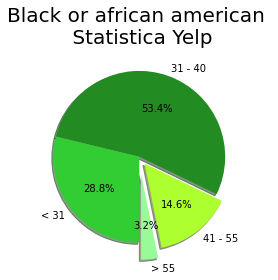

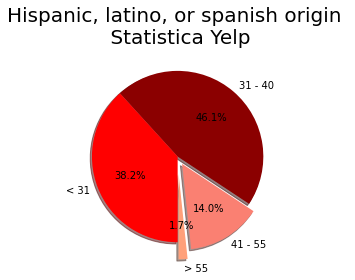

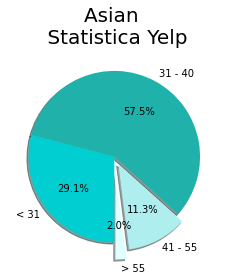

In [12]:
labels = ['> 55', '41 - 55', '31 - 40', '< 31'  ]
sizes = [whiteOver, whiteU55, whiteU40, whiteU30] 
explode = [0.2, 0.1, 0, 0]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90, 
        colors=['plum',  'mediumorchid', 'darkviolet', 'violet'])
ax1.set_title("White \n Statistica Yelp", fontsize = 20)
fig.tight_layout()

labels = ['> 55', '41 - 55', '31 - 40', '< 31'  ]
sizes = [blackOver, blackU55, blackU40, blackU30] 
explode = [0.2, 0.1, 0, 0]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90,
        colors=['palegreen',  'greenyellow', 'forestgreen', 'limegreen'])  
ax1.set_title("Black or african american \n Statistica Yelp", fontsize = 20)
fig.tight_layout()

labels = ['> 55', '41 - 55', '31 - 40', '< 31'  ]
sizes = [hispanicOver, hispanicU55, hispanicU40, hispanicU30] 
explode = [0.2, 0.1, 0, 0]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90,
         colors=['lightsalmon',  'salmon', 'darkred', 'red'])  
ax1.set_title("Hispanic, latino, or spanish origin \n Statistica Yelp", fontsize = 20)
fig.tight_layout()

labels = ['> 55', '41 - 55', '31 - 40', '< 31'  ]
sizes = [asianOver, asianU55, asianU40, asianU30] 
explode = [0.2, 0.1, 0, 0]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90,
        colors=['lightcyan',  'paleturquoise', 'lightseagreen', 'darkturquoise'])  
ax1.set_title("Asian \n Statistica Yelp", fontsize = 20)
fig.tight_layout()


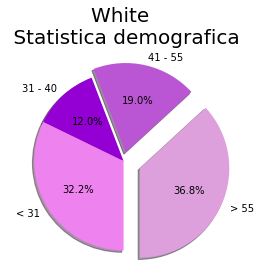

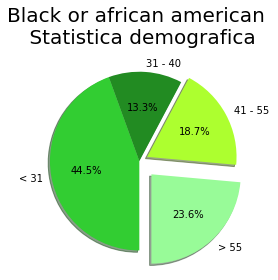

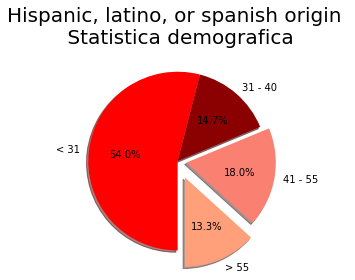

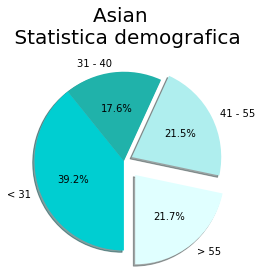

In [13]:
labels = ['> 55', '41 - 55', '31 - 40', '< 31'  ]
sizes = [36.83, 18.99, 11.97, 32.21] 
explode = [0.2, 0.1, 0, 0]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90, 
        colors=['plum',  'mediumorchid', 'darkviolet', 'violet'])
ax1.set_title("White \n Statistica demografica", fontsize = 20)
fig.tight_layout()

labels = ['> 55', '41 - 55', '31 - 40', '< 31'  ]
sizes = [23.58, 18.66, 13.31, 44.46] 
explode = [0.2, 0.1, 0, 0]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90,
        colors=['palegreen',  'greenyellow', 'forestgreen', 'limegreen'])  
ax1.set_title("Black or african american \n Statistica demografica", fontsize = 20)
fig.tight_layout()

labels = ['> 55', '41 - 55', '31 - 40', '< 31'  ]
sizes = [13.27, 17.98, 14.74, 54.01] 
explode = [0.2, 0.1, 0, 0]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90,
         colors=['lightsalmon',  'salmon', 'darkred', 'red'])  
ax1.set_title("Hispanic, latino, or spanish origin \n Statistica demografica", fontsize = 20)
fig.tight_layout()

labels = ['> 55', '41 - 55', '31 - 40', '< 31'  ]
sizes = [21.69, 21.48, 17.63, 39.2] 
explode = [0.2, 0.1, 0, 0]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90,
        colors=['lightcyan',  'paleturquoise', 'lightseagreen', 'darkturquoise'])  
ax1.set_title("Asian \n Statistica demografica", fontsize = 20)
fig.tight_layout()


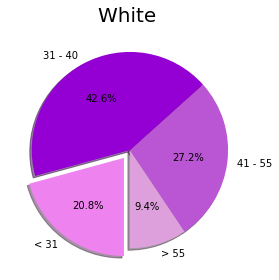

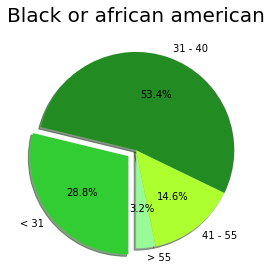

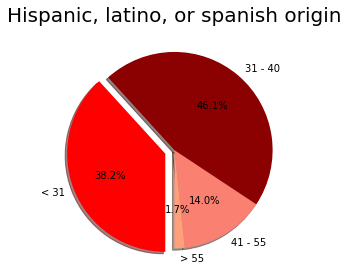

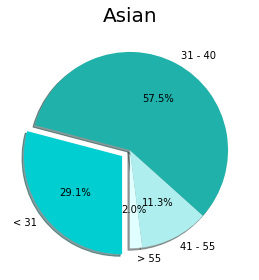

In [ ]:
labels = ['> 55', '41 - 55', '31 - 40', '< 31'  ]
sizes = [whiteOver, whiteU55, whiteU40, whiteU30] 
explode = [0, 0, 0, 0.1]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90, 
        colors=['plum',  'mediumorchid', 'darkviolet', 'violet'])
ax1.set_title("White ", fontsize = 20)
fig.tight_layout()

labels = ['> 55', '41 - 55', '31 - 40', '< 31'  ]
sizes = [blackOver, blackU55, blackU40, blackU30] 
explode = [0, 0, 0, 0.1]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90,
        colors=['palegreen',  'greenyellow', 'forestgreen', 'limegreen'])  
ax1.set_title("Black or african american", fontsize = 20)
fig.tight_layout()

labels = ['> 55', '41 - 55', '31 - 40', '< 31'  ]
sizes = [hispanicOver, hispanicU55, hispanicU40, hispanicU30] 
explode = [0, 0, 0, 0.1]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90,
         colors=['lightsalmon',  'salmon', 'darkred', 'red'])  
ax1.set_title("Hispanic, latino, or spanish origin", fontsize = 20)
fig.tight_layout()

labels = ['> 55', '41 - 55', '31 - 40', '< 31'  ]
sizes = [asianOver, asianU55, asianU40, asianU30] 
explode = [0, 0, 0, 0.1]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90,
        colors=['lightcyan',  'paleturquoise', 'lightseagreen', 'darkturquoise'])  
ax1.set_title("Asian", fontsize = 20)
fig.tight_layout()


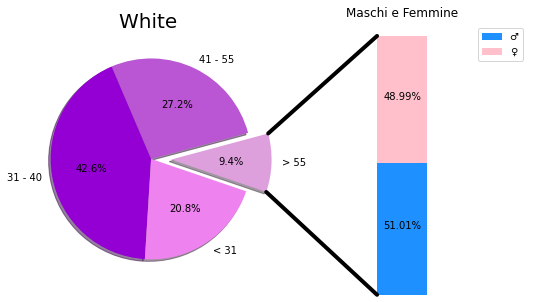

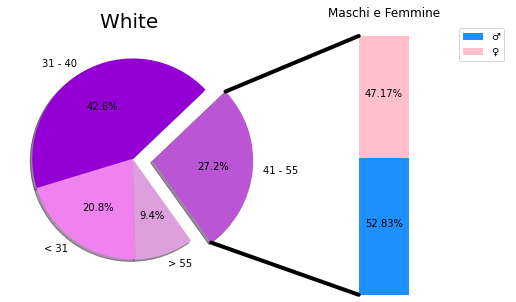

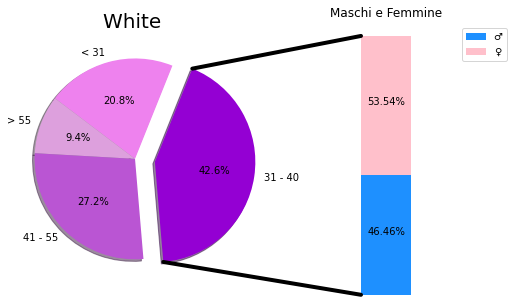

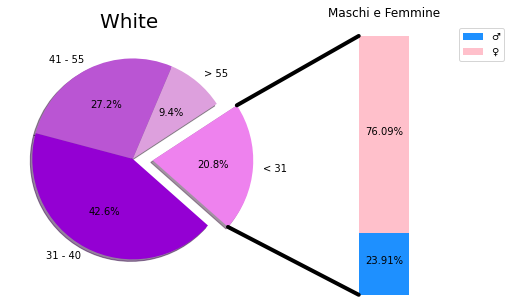

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

whiteOverTot = len(res[(res['ethnicity'] == 'white') & (res['age'] > 55)])
whiteOverFem = (len(res[(res['ethnicity'] == 'white') & (res['age'] > 55) & (res['gender'] == 'feminine')]) * 100) / whiteOverTot
whiteOverMas = (len(res[(res['ethnicity'] == 'white') & (res['age'] > 55) & (res['gender'] == 'masculine')]) * 100) / whiteOverTot

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [whiteOver, whiteU55, whiteU40, whiteU30]
labels = ['> 55', '41 - 55', '31 - 40', '< 31'  ]
explode = [0.2, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -2 * ratios[0]
ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=angle, 
        colors=['plum',  'mediumorchid', 'darkviolet', 'violet'])
ax1.set_title("White ", fontsize = 20)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [whiteOverMas, whiteOverFem]
width = .2
colors = ['dodgerblue', 'pink']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() ),
             ha='center')

ax2.set_title('Maschi e Femmine')
ax2.legend(( '♂', '♀'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()










#SOTTO I 55
whiteOverTot = len(res[(res['ethnicity'] == 'white') & (res['age'] > 40) & (res['age'] <= 55)])
whiteOverFem55 = (len(res[(res['ethnicity'] == 'white') & (res['age'] > 40) & (res['age'] <= 55) & (res['gender'] == 'feminine')]) * 100) / whiteOverTot
whiteOverMas55 = (len(res[(res['ethnicity'] == 'white') & (res['age'] > 40) & (res['age'] <= 55) & (res['gender'] == 'masculine')]) * 100) / whiteOverTot

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [whiteU55, whiteU40, whiteU30, whiteOver ]
labels = ['41 - 55' , '31 - 40' , '< 31'  , '> 55']
explode = [0.2, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -2 * ratios[0]
ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=angle, 
        colors=[  'mediumorchid', 'darkviolet', 'violet', 'plum' ])
ax1.set_title("White ", fontsize = 20)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [whiteOverMas55, whiteOverFem55]
width = .2
colors = ['dodgerblue', 'pink']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() ),
             ha='center')

ax2.set_title('Maschi e Femmine')
ax2.legend(( '♂', '♀'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()








#SOTTO I 40
whiteOverTot = len(res[(res['ethnicity'] == 'white') & (res['age'] > 30) & (res['age'] <= 40)])
whiteOverFem40 = (len(res[(res['ethnicity'] == 'white') & (res['age'] > 30) & (res['age'] <= 40) & (res['gender'] == 'feminine')]) * 100) / whiteOverTot
whiteOverMas40 = (len(res[(res['ethnicity'] == 'white') & (res['age'] > 30) & (res['age'] <= 40) & (res['gender'] == 'masculine')]) * 100) / whiteOverTot

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [whiteU40, whiteU30, whiteOver, whiteU55 ]
labels = ['31 - 40' , '< 31'  , '> 55', '41 - 55' ]
explode = [0.2, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -2 * ratios[0]
ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=angle, 
        colors=[ 'darkviolet', 'violet', 'plum',  'mediumorchid'])
ax1.set_title("White ", fontsize = 20)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [whiteOverMas40, whiteOverFem40]
width = .2
colors = ['dodgerblue', 'pink']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() ),
             ha='center')

ax2.set_title('Maschi e Femmine')
ax2.legend(( '♂', '♀'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()








#SOTTO I 30
whiteOverTot = len(res[(res['ethnicity'] == 'white') & (res['age'] <= 30)])
whiteOverFemP = (len(res[(res['ethnicity'] == 'white') & (res['age'] <= 30) & (res['gender'] == 'feminine')]) * 100) / whiteOverTot
whiteOverMasP = (len(res[(res['ethnicity'] == 'white') & (res['age'] <= 30) & (res['gender'] == 'masculine')]) * 100) / whiteOverTot

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [ whiteU30, whiteOver, whiteU55, whiteU40]
labels = ['< 31'  , '> 55', '41 - 55', '31 - 40' ]
explode = [0.2, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -2 * ratios[0]
ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=angle, 
        colors=[ 'violet', 'plum',  'mediumorchid', 'darkviolet'])
ax1.set_title("White ", fontsize = 20)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [whiteOverMasP, whiteOverFemP]
width = .2
colors = ['dodgerblue', 'pink']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() ),
             ha='center')

ax2.set_title('Maschi e Femmine')
ax2.legend(( '♂', '♀'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

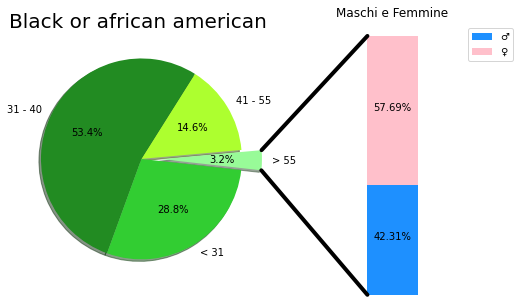

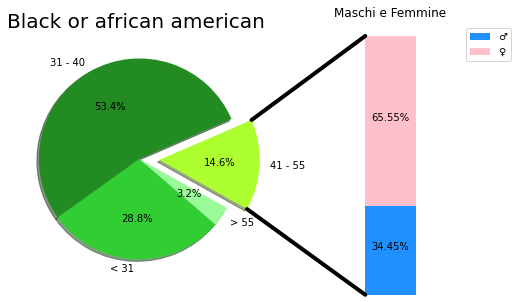

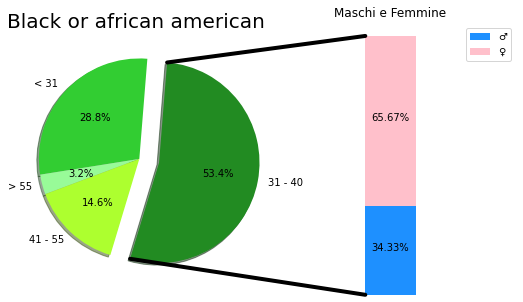

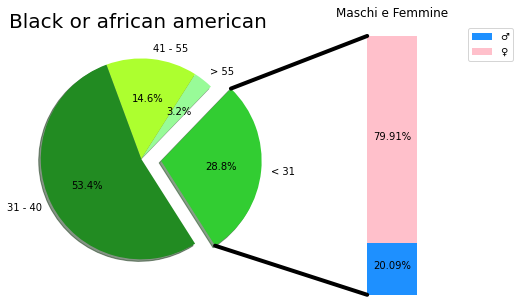

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

blackOverTot = len(res[(res['ethnicity'] == 'black or african american') & (res['age'] > 55)])
blackOverFem = (len(res[(res['ethnicity'] == 'black or african american') & (res['age'] > 55) & (res['gender'] == 'feminine')]) * 100) / blackOverTot
blackOverMas = (len(res[(res['ethnicity'] == 'black or african american') & (res['age'] > 55) & (res['gender'] == 'masculine')]) * 100) / blackOverTot

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [blackOver, blackU55, blackU40, blackU30]
labels = ['> 55', '41 - 55', '31 - 40', '< 31'  ]
explode = [0.2, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -2 * ratios[0]
ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=angle, 
        colors=['palegreen',  'greenyellow', 'forestgreen', 'limegreen'])  
ax1.set_title("Black or african american ", fontsize = 20)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [blackOverMas, blackOverFem]
width = .2
colors = ['dodgerblue', 'pink']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() ),
             ha='center')

ax2.set_title('Maschi e Femmine')
ax2.legend(( '♂', '♀'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()







#SOTTO I 55
blackOverTot = len(res[(res['ethnicity'] == 'black or african american') & (res['age'] > 40) & (res['age'] <= 55)])
blackOverFem55 = (len(res[(res['ethnicity'] == 'black or african american') & (res['age'] > 40) & (res['age'] <= 55) & (res['gender'] == 'feminine')]) * 100) / blackOverTot
blackOverMas55 = (len(res[(res['ethnicity'] == 'black or african american') & (res['age'] > 40) & (res['age'] <= 55) & (res['gender'] == 'masculine')]) * 100) / blackOverTot

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [blackU55, blackU40, blackU30, blackOver]
labels = ['41 - 55', '31 - 40' , '< 31' , '> 55' ]
explode = [0.2, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -2 * ratios[0]
ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=angle, 
        colors=['greenyellow',  'forestgreen', 'limegreen', 'palegreen' ])  
ax1.set_title("Black or african american ", fontsize = 20)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [blackOverMas55, blackOverFem55]
width = .2
colors = ['dodgerblue', 'pink']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() ),
             ha='center')

ax2.set_title('Maschi e Femmine')
ax2.legend(( '♂', '♀'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()







#SOTTO I 40
blackOverTot = len(res[(res['ethnicity'] == 'black or african american') & (res['age'] > 30) & (res['age'] <= 40)])
blackOverFem40 = (len(res[(res['ethnicity'] == 'black or african american') & (res['age'] > 30) & (res['age'] <= 40) & (res['gender'] == 'feminine')]) * 100) / blackOverTot
blackOverMas40 = (len(res[(res['ethnicity'] == 'black or african american') & (res['age'] > 30) & (res['age'] <= 40) & (res['gender'] == 'masculine')]) * 100) / blackOverTot

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [blackU40, blackU30, blackOver, blackU55]
labels = ['31 - 40' , '< 31' , '> 55', '41 - 55' ]
explode = [0.2, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -2 * ratios[0]
ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=angle, 
        colors=[ 'forestgreen', 'limegreen', 'palegreen',  'greenyellow' ])  
ax1.set_title("Black or african american ", fontsize = 20)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [blackOverMas40, blackOverFem40]
width = .2
colors = ['dodgerblue', 'pink']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() ),
             ha='center')

ax2.set_title('Maschi e Femmine')
ax2.legend(( '♂', '♀'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()







#SOTTO I 30
blackOverTot = len(res[(res['ethnicity'] == 'black or african american') & (res['age'] <= 30)])
blackOverFem30 = (len(res[(res['ethnicity'] == 'black or african american') & (res['age'] <= 30) & (res['gender'] == 'feminine')]) * 100) / blackOverTot
blackOverMas30 = (len(res[(res['ethnicity'] == 'black or african american') & (res['age'] <= 30) & (res['gender'] == 'masculine')]) * 100) / blackOverTot

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [blackU30, blackOver, blackU55, blackU40]
labels = ['< 31' , '> 55', '41 - 55', '31 - 40' ]
explode = [0.2, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -2 * ratios[0]
ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=angle, 
        colors=[ 'limegreen', 'palegreen',  'greenyellow', 'forestgreen'])  
ax1.set_title("Black or african american ", fontsize = 20)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [blackOverMas30, blackOverFem30]
width = .2
colors = ['dodgerblue', 'pink']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() ),
             ha='center')

ax2.set_title('Maschi e Femmine')
ax2.legend(( '♂', '♀'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

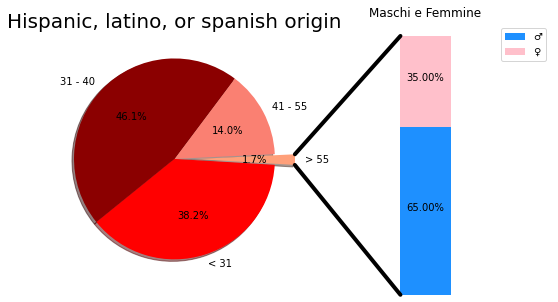

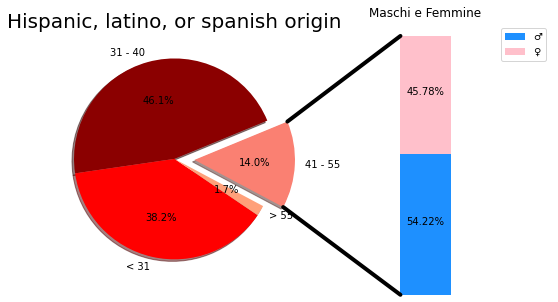

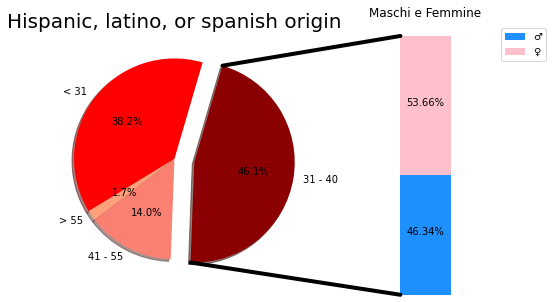

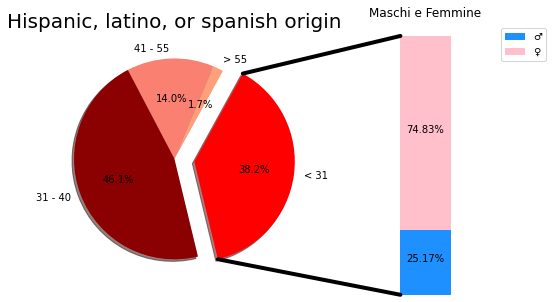

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

hispanicOverTot = len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] > 55)])
hispanicOverFem = (len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] > 55) & (res['gender'] == 'feminine')]) * 100) / hispanicOverTot
hispanicOverMas = (len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] > 55) & (res['gender'] == 'masculine')]) * 100) / hispanicOverTot

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [hispanicOver, hispanicU55, hispanicU40, hispanicU30]
labels = ['> 55', '41 - 55', '31 - 40', '< 31'  ]
explode = [0.2, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -2 * ratios[0]
ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=angle, 
        colors=['lightsalmon',  'salmon', 'darkred', 'red'])  
ax1.set_title("Hispanic, latino, or spanish origin", fontsize = 20)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [hispanicOverMas, hispanicOverFem]
width = .2
colors = ['dodgerblue', 'pink']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() ),
             ha='center')

ax2.set_title('Maschi e Femmine')
ax2.legend(( '♂', '♀'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()








#SOTTO I 55
hispanicOverTot = len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] > 40) & (res['age'] <= 55)])
hispanicOverFem55 = (len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] > 40) & (res['age'] <= 55) & (res['gender'] == 'feminine')]) * 100) / hispanicOverTot
hispanicOverMas55 = (len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] > 40) & (res['age'] <= 55) & (res['gender'] == 'masculine')]) * 100) / hispanicOverTot

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [hispanicU55, hispanicU40, hispanicU30, hispanicOver ]
labels = [ '41 - 55' ,'31 - 40','< 31' ,'> 55' ]
explode = [0.2, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -2 * ratios[0]
ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=angle, 
        colors=[  'salmon', 'darkred' ,'red','lightsalmon'])  
ax1.set_title("Hispanic, latino, or spanish origin", fontsize = 20)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [hispanicOverMas55, hispanicOverFem55]
width = .2
colors = ['dodgerblue', 'pink']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() ),
             ha='center')

ax2.set_title('Maschi e Femmine')
ax2.legend(( '♂', '♀'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()









#SOTTO I 40
hispanicOverTot = len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] > 30) & (res['age'] <= 40)])
hispanicOverFem40 = (len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] > 30) & (res['age'] <= 40) & (res['gender'] == 'feminine')]) * 100) / hispanicOverTot
hispanicOverMas40 = (len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] > 30) & (res['age'] <= 40) & (res['gender'] == 'masculine')]) * 100) / hispanicOverTot

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [hispanicU40, hispanicU30, hispanicOver, hispanicU55 ]
labels = [ '31 - 40','< 31' ,'> 55', '41 - 55' ]
explode = [0.2, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -2 * ratios[0]
ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=angle, 
        colors=['darkred' ,'red','lightsalmon',  'salmon'])  
ax1.set_title("Hispanic, latino, or spanish origin", fontsize = 20)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [hispanicOverMas40, hispanicOverFem40]
width = .2
colors = ['dodgerblue', 'pink']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() ),
             ha='center')

ax2.set_title('Maschi e Femmine')
ax2.legend(( '♂', '♀'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()






#SOTTO I 30
hispanicOverTot = len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] <= 30)])
hispanicOverFem30 = (len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] <= 30) & (res['gender'] == 'feminine')]) * 100) / hispanicOverTot
hispanicOverMas30 = (len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] <= 30) & (res['gender'] == 'masculine')]) * 100) / hispanicOverTot

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [hispanicU30, hispanicOver, hispanicU55, hispanicU40 ]
labels = [ '< 31' ,'> 55', '41 - 55', '31 - 40' ]
explode = [0.2, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -2 * ratios[0]
ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=angle, 
        colors=[ 'red','lightsalmon',  'salmon', 'darkred'])  
ax1.set_title("Hispanic, latino, or spanish origin", fontsize = 20)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [hispanicOverMas30, hispanicOverFem30]
width = .2
colors = ['dodgerblue', 'pink']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() ),
             ha='center')

ax2.set_title('Maschi e Femmine')
ax2.legend(( '♂', '♀'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

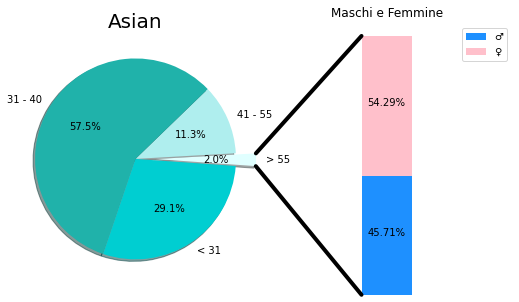

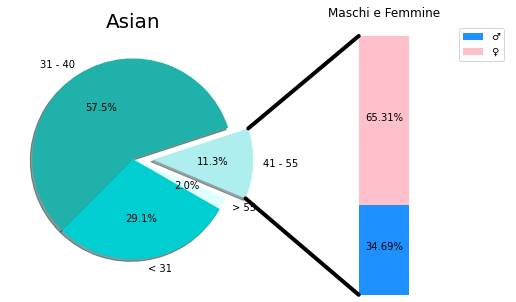

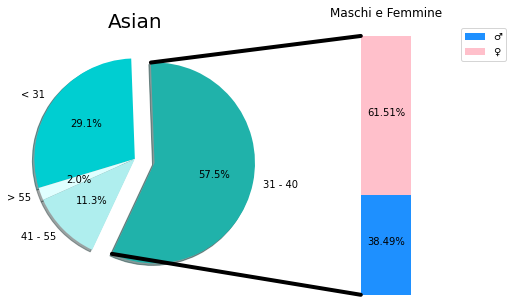

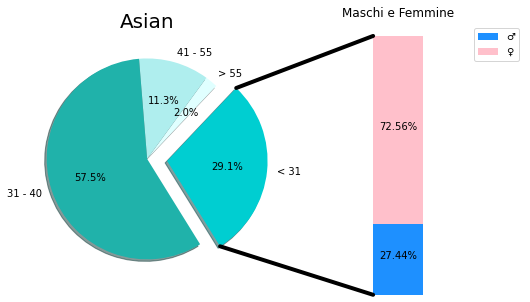

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

asianOverTot = len(res[(res['ethnicity'] == 'asian') & (res['age'] > 55)])
asianOverFem = (len(res[(res['ethnicity'] == 'asian') & (res['age'] > 55) & (res['gender'] == 'feminine')]) * 100) / asianOverTot
asianOverMas = (len(res[(res['ethnicity'] == 'asian') & (res['age'] > 55) & (res['gender'] == 'masculine')]) * 100) / asianOverTot

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [asianOver, asianU55, asianU40, asianU30]
labels = ['> 55', '41 - 55', '31 - 40', '< 31'  ]
explode = [0.2, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -2 * ratios[0]
ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=angle, 
        colors=['lightcyan',  'paleturquoise', 'lightseagreen', 'darkturquoise'])
ax1.set_title("Asian", fontsize = 20)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [asianOverMas, asianOverFem]
width = .2
colors = ['dodgerblue', 'pink']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() ),
             ha='center')

ax2.set_title('Maschi e Femmine')
ax2.legend(( '♂', '♀'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()






#SOTTO I 55
asianOverTot = len(res[(res['ethnicity'] == 'asian') & (res['age'] > 40) & (res['age'] <= 55)])
asianOverFem55 = (len(res[(res['ethnicity'] == 'asian') & (res['age'] > 40) & (res['age'] <= 55) & (res['gender'] == 'feminine')]) * 100) / asianOverTot
asianOverMas55 = (len(res[(res['ethnicity'] == 'asian') & (res['age'] > 40) & (res['age'] <= 55) & (res['gender'] == 'masculine')]) * 100) / asianOverTot

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [asianU55,asianU40,asianU30, asianOver]
labels = [ '41 - 55' , '31 - 40', '< 31','> 55' ]
explode = [0.2, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -2 * ratios[0]
ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=angle, 
        colors=['paleturquoise', 'lightseagreen' , 'darkturquoise', 'lightcyan'])
ax1.set_title("Asian", fontsize = 20)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [asianOverMas55, asianOverFem55]
width = .2
colors = ['dodgerblue', 'pink']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() ),
             ha='center')

ax2.set_title('Maschi e Femmine')
ax2.legend(( '♂', '♀'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()






#SOTTO I 40
asianOverTot = len(res[(res['ethnicity'] == 'asian') & (res['age'] > 30) & (res['age'] <= 40)])
asianOverFem40 = (len(res[(res['ethnicity'] == 'asian') & (res['age'] > 30) & (res['age'] <= 40) & (res['gender'] == 'feminine')]) * 100) / asianOverTot
asianOverMas40 = (len(res[(res['ethnicity'] == 'asian') & (res['age'] > 30) & (res['age'] <= 40) & (res['gender'] == 'masculine')]) * 100) / asianOverTot

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [asianU40,asianU30, asianOver, asianU55]
labels = [ '31 - 40', '< 31','> 55', '41 - 55' ]
explode = [0.2, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -2 * ratios[0]
ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=angle, 
        colors=[ 'lightseagreen' , 'darkturquoise', 'lightcyan',  'paleturquoise'])
ax1.set_title("Asian", fontsize = 20)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [asianOverMas40, asianOverFem40]
width = .2
colors = ['dodgerblue', 'pink']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() ),
             ha='center')

ax2.set_title('Maschi e Femmine')
ax2.legend(( '♂', '♀'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()






#SOTTO I 30
asianOverTot = len(res[(res['ethnicity'] == 'asian') & (res['age'] <= 30)])
asianOverFem30 = (len(res[(res['ethnicity'] == 'asian') & (res['age'] <= 30) & (res['gender'] == 'feminine')]) * 100) / asianOverTot
asianOverMas30 = (len(res[(res['ethnicity'] == 'asian') & (res['age'] <= 30) & (res['gender'] == 'masculine')]) * 100) / asianOverTot

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [asianU30, asianOver, asianU55, asianU40]
labels = [ '< 31','> 55', '41 - 55', '31 - 40' ]
explode = [0.2, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -2 * ratios[0]
ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=angle, 
        colors=['darkturquoise', 'lightcyan',  'paleturquoise', 'lightseagreen' ])
ax1.set_title("Asian", fontsize = 20)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [asianOverMas30, asianOverFem30]
width = .2
colors = ['dodgerblue', 'pink']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() ),
             ha='center')

ax2.set_title('Maschi e Femmine')
ax2.legend(( '♂', '♀'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()